# Descripción del proyecto

La cadena de gimnasios Model Fitness se enfrenta a un desafío común en el sector de servicios: la pérdida de clientes. Aunque la cancelación de membresías puede ser fácilmente identificada cuando un usuario cancela su cuenta o no renueva su contrato, muchos clientes abandonan el servicio de manera menos evidente, lo que dificulta la detección temprana de la fuga. Este fenómeno de "pérdida silenciosa" es un riesgo significativo para la sostenibilidad de la empresa, ya que no siempre es evidente cuándo un cliente está en vías de dejar de asistir al gimnasio.

Con el fin de abordar esta problemática, Model Fitness está implementando una estrategia basada en el análisis de datos, cuyo objetivo es predecir y reducir la tasa de cancelación. Para ello, se ha digitalizado una gran cantidad de datos sobre los usuarios, sus visitas y comportamiento en el gimnasio. El propósito de este proyecto es analizar estos datos para predecir la probabilidad de pérdida de clientes en el futuro cercano y elaborar una estrategia de retención efectiva.

El análisis se centrará en predecir la probabilidad de cancelación de los clientes, identificar los grupos de usuarios más propensos a abandonar el gimnasio, analizar los factores que influyen en la pérdida y proporcionar recomendaciones clave para mejorar la atención al cliente y reducir la rotación. Con este enfoque basado en datos, se espera poder optimizar la estrategia de interacción con los usuarios y fortalecer la relación entre Model Fitness y sus clientes.

# Paso 1. Descargar los datos

In [1]:
#Importar librerías
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#Cargar el archivo
data = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
#Verificar que haya cargado correctamente el archivo
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


# Paso 2. Llevar a cabo el análisis exploratorio de datos (EDA)

In [4]:
#Convertir todos los nombres de las columnas a minúsculas
data.columns = data.columns.str.lower()

In [5]:
#Verificar información general
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

**¿Contiene alguna característica ausente?**

In [6]:
#Contar valores ausentes
ausentes = data.isna().sum()
ausentes

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [7]:
#Estudiar los valores promedio y la desviación estándar
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


* El análisis de valores ausentes utilizando data.isna().sum() revela que ninguna de las características tiene valores ausentes. Cada columna contiene 4000 valores no nulos.

* Muchas de las características, como gender, near_location, partner, promo_friends, phone, group_visits, y churn, son binarias. La media de estas variables indica la proporción de observaciones en cada categoría. Por ejemplo, gender tiene una media de aproximadamente 0.51, lo que sugiere una distribución casi equitativa entre hombres y mujeres.

* En contract_period varía de 1 a 12 meses, con una media de 4.68 meses, indicando que los contratos más comunes tienen una duración relativamente corta.

* La edad media es de 29 años, con un rango que va desde los 18 hasta los 41 años.

* Los cargos adicionales promedian alrededor de 146.94 unidades monetarias, con una gran variabilidad (desviación estándar de 96.36).

* En avg_class_frequency_total y avg_class_frequency_current_month muestran la frecuencia media de visitas, con medias de 1.88 y 1.77 visitas por semana, respectivamente.

**Observación de los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron**

In [8]:
#Observar los valores medios de las características en dos grupos
churn_data = data.groupby('churn').mean()

In [9]:
churn_data

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Dado lo anterior, se puede decir que:

* Los clientes que viven o trabajan cerca del gimnasio tienen una mayor probabilidad de permanecer. La cercanía es un factor importante para la retención.

* Ser empleado de una empresa asociada parece contribuir a una mayor retención. Los descuentos y beneficios pueden ser un incentivo eficaz.

* Las inscripciones a través de promociones "trae a un amigo" ayudan a mantener a los clientes. Las relaciones sociales pueden influir en la decisión de continuar asistiendo.

* Los clientes con contratos más largos tienden a quedarse más tiempo. Esto podría deberse a un mayor compromiso y posiblemente a tarifas más atractivas para contratos más largos.

* La participación en sesiones grupales está asociada con una mayor retención. Esto sugiere que los eventos y clases grupales pueden ser una estrategia efectiva para mantener a los clientes.

* Los clientes que se quedan tienden a ser un poco mayores. Esto podría reflejar mayor estabilidad o compromiso con rutinas de ejercicio.

* Los clientes que gastan más en servicios adicionales tienden a quedarse más tiempo. Este puede ser un indicador de mayor compromiso con el gimnasio.

* Los clientes con más tiempo restante en sus contratos tienen más probabilidades de quedarse, lo que refuerza la importancia de los contratos a largo plazo.

* La frecuencia de visitas es un fuerte indicador de retención. Los clientes que asisten con más frecuencia, tanto en el total como en el mes actual, tienen más probabilidades de quedarse.

**Trazar histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron**

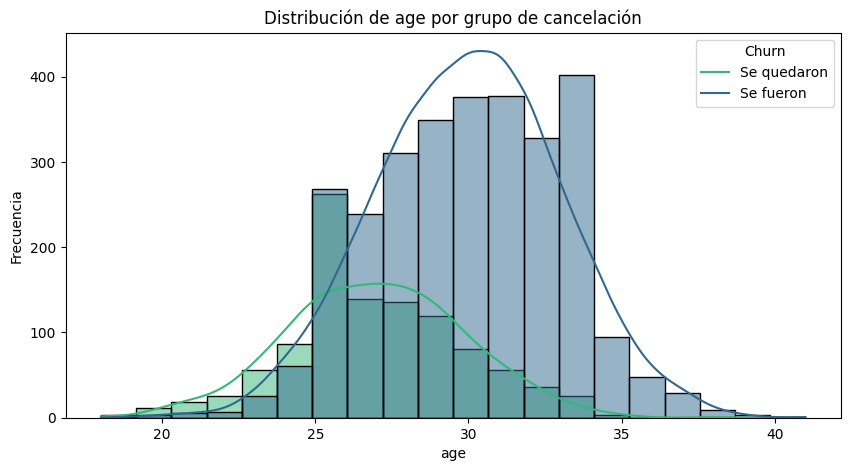

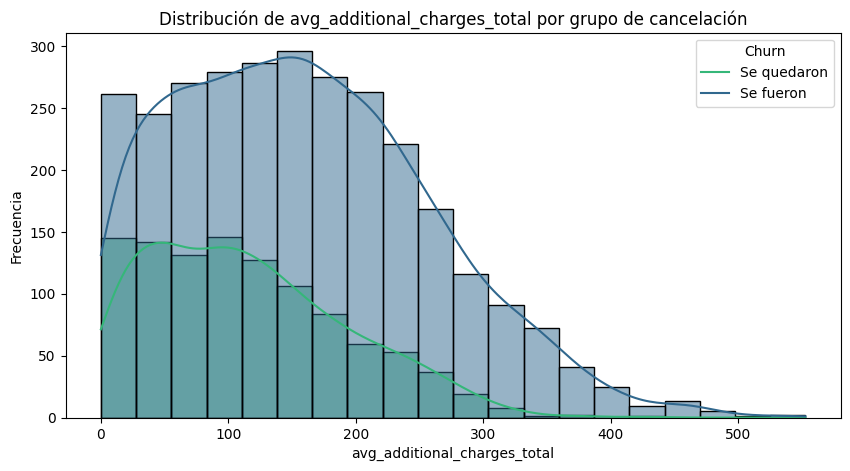

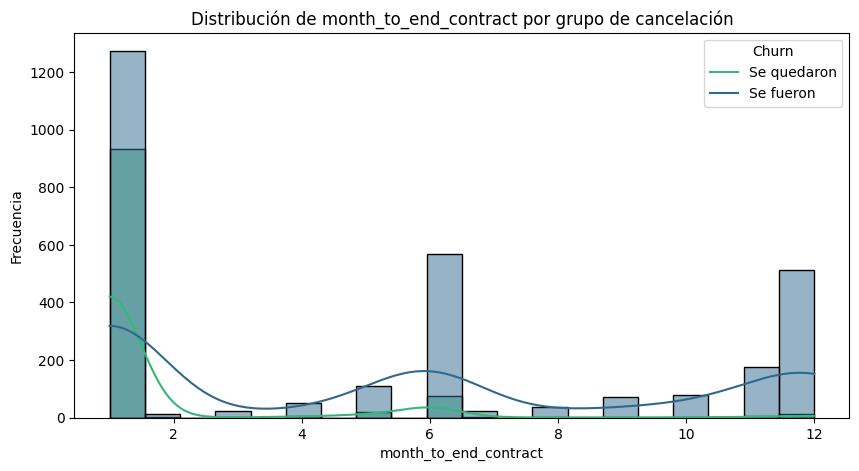

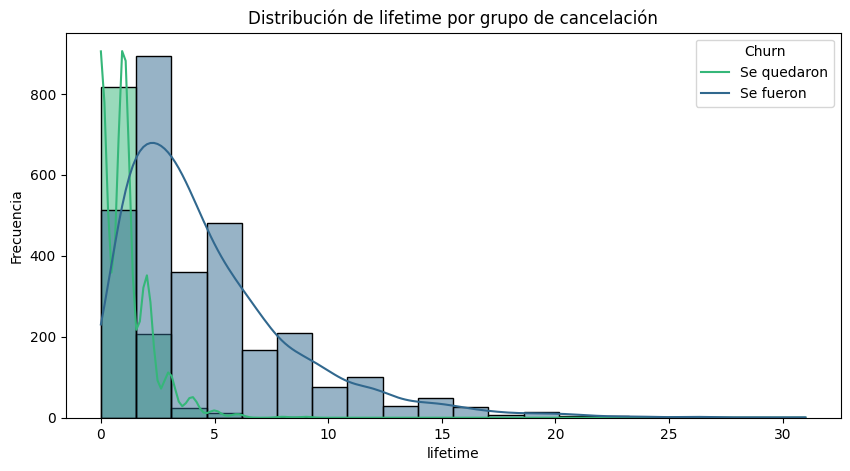

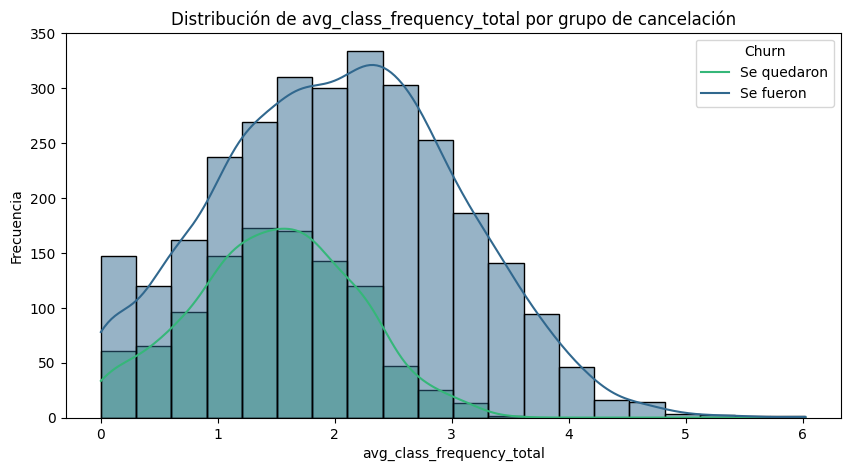

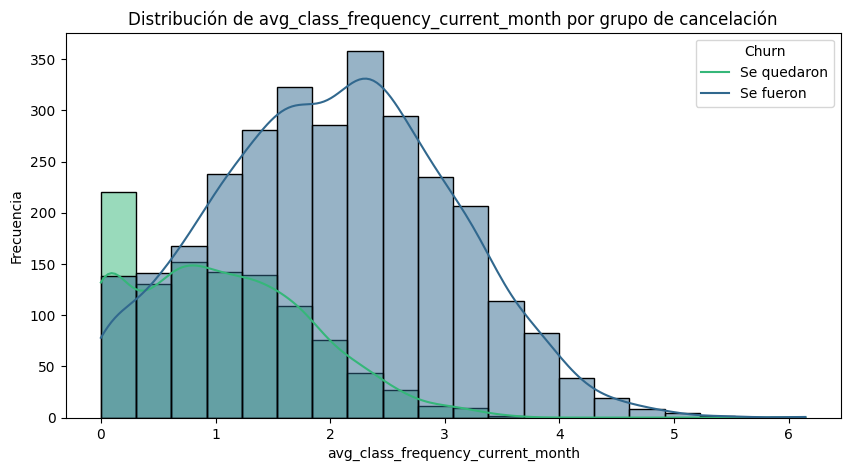

In [10]:
#Listar las columnas que queremos analizar
features = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 
            'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

#Crear histogramas para cada característica
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=data, x=feature, hue='churn', kde=True, palette='viridis', bins=20)
    plt.title(f'Distribución de {feature} por grupo de cancelación')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend(title='Churn', labels=['Se quedaron', 'Se fueron'])
    plt.show()

**Análisis de Histogramas**

- **Distribución de age**

Se quedaron: La distribución de edad es más uniforme con una ligera concentración entre los 25 y 35 años.

Se fueron: La distribución se centra más en los clientes jóvenes, de 18 a 30 años.

Los clientes más jóvenes parecen ser más propensos a irse, mientras que los de 25 a 35 años tienden a quedarse más tiempo. Esto puede indicar que las personas mayores encuentran más valor o están más comprometidas con su membresía.

- **Distribución de avg_additional_charges_total**

Se quedaron: Los clientes que gastan más en cargos adicionales tienen una tendencia a quedarse.

Se fueron: La distribución muestra menores gastos en cargos adicionales.

Gastar más en servicios adicionales (como cafetería, productos deportivos, etc.) parece estar correlacionado con una mayor retención. Los clientes que invierten más en estos servicios pueden estar más comprometidos con el gimnasio.

- **Distribución de month_to_end_contract**

Se quedaron: Los clientes con más meses restantes en su contrato tienden a quedarse.

Se fueron: Los que tienen menos meses restantes son más propensos a cancelar.

Mantener contratos de larga duración puede ser una estrategia efectiva para retener clientes. Los contratos más largos pueden ofrecer mayor estabilidad y compromiso.

- **Distribución de lifetime**

Se quedaron: Los clientes con una mayor "lifetime" (tiempo desde que se unieron) tienden a quedarse.

Se fueron: Aquellos con menos tiempo desde que se unieron son más propensos a irse.

Los clientes con una relación más larga con el gimnasio son más leales. Esto sugiere que las primeras interacciones y la experiencia inicial en el gimnasio son cruciales para la retención.

- **Distribución de avg_class_frequency_total**

Se quedaron: Los clientes con una frecuencia total de clases más alta tienden a quedarse.

Se fueron: La frecuencia total de clases es más baja.

Una mayor frecuencia de visitas a lo largo del tiempo está fuertemente asociada con la retención. Fomentar una mayor asistencia puede ayudar a reducir la rotación.

- **Distribución de avg_class_frequency_current_month**

Se quedaron: Los clientes que han mantenido una alta frecuencia de visitas en el mes actual tienden a quedarse.

Se fueron: Los clientes con menor frecuencia de visitas en el mes actual son más propensos a cancelar.

La frecuencia de visitas en el mes actual es un fuerte indicador de retención. Implementar estrategias para mantener a los clientes activos regularmente puede ser crucial.

Este análisis visual confirma muchas de las tendencias observadas anteriormente en el análisis de valores medios. La retención de clientes parece estar influenciada por factores como la edad, los gastos adicionales, la duración del contrato, el tiempo de membresía y la frecuencia de visitas.

**Crear una matriz de correlación**

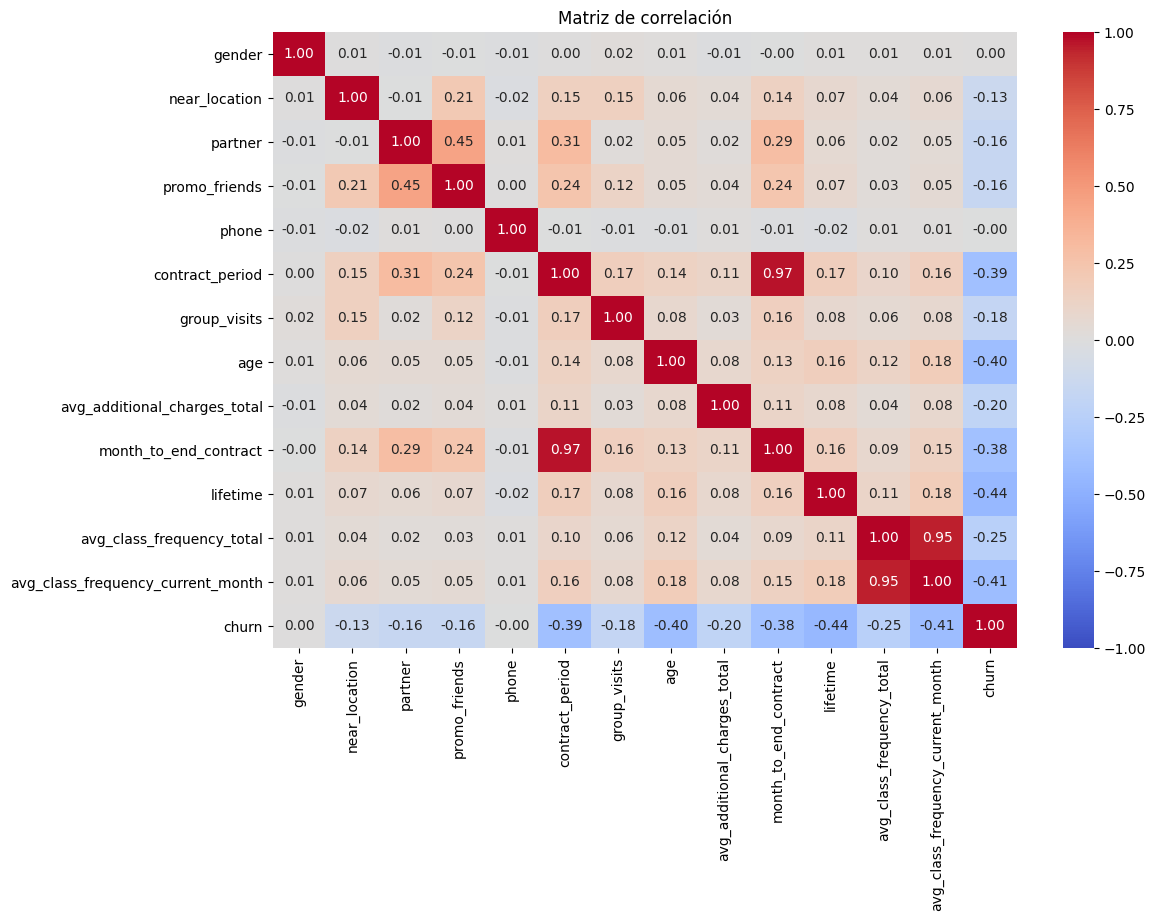

In [11]:
#Crear una matriz de correlación
correlation_matrix = data.corr()

#Graficar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()

Observaciones Principales:

- contract_period y month_to_end_contract: Tienen una fuerte correlación positiva (0.97), lo cual es lógico ya que los contratos más largos usualmente tienen más meses restantes.

- lifetime y avg_class_frequency_total: Muestran una fuerte correlación positiva (0.95), indicando que los clientes que han estado más tiempo en el gimnasio tienden a tener una frecuencia de visitas acumulada más alta.

- churn y contract_period: Correlación negativa moderada (-0.39). Esto sugiere que los clientes con contratos más largos son menos propensos a cancelar.

- churn y month_to_end_contract: Correlación negativa moderada (-0.38), similar al periodo del contrato. Los clientes con más meses restantes en su contrato son menos propensos a irse.

- churn y lifetime: Correlación negativa moderada (-0.44). Esto refuerza la idea de que los clientes con una relación más larga con el gimnasio son más leales.

- churn y avg_class_frequency_current_month: Correlación negativa moderada (-0.41). Una mayor frecuencia de visitas en el mes actual está asociada con una menor probabilidad de cancelación.

Interpretación:

* Contratos Más Largos y Frecuencia de Visitas: Los contratos más largos y una alta frecuencia de visitas son indicadores significativos de retención de clientes. Esto subraya la importancia de fomentar la compra de contratos de mayor duración y promover una mayor asistencia a clases.

* Relación a Largo Plazo: La "lifetime" de los clientes también juega un papel crucial. Aquellos que han estado más tiempo en el gimnasio tienden a quedarse, lo cual sugiere que las estrategias para mejorar la experiencia inicial y mantener el compromiso a largo plazo pueden ser efectivas.

* Cargos Adicionales: Aunque no se destaca tanto como otros factores, los cargos adicionales también muestran una correlación con la retención, lo que implica que incrementar el uso de servicios adicionales puede ayudar a mantener a los clientes.

Esta información nos da una buena base para desarrollar estrategias de retención enfocadas en contratos de mayor duración, aumentar la frecuencia de visitas y mejorar la relación inicial y continua con los clientes.

# Paso 3. Construir un modelo para predecir la cancelación de usuarios

**Dividir los datos en conjuntos de entrenamiento y validación**

In [12]:
#Separar características (X) y variable objetivo (y)
X = data.drop('churn', axis=1)
y = data['churn']

#Dividir los datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)

Tamaño del conjunto de entrenamiento: (2800, 13)
Tamaño del conjunto de validación: (1200, 13)


**Entrenar el modelo en el set de entrenamiento con dos métodos**

Regresión logística

In [13]:
#Inicializar y entrenar el modelo
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

#Hacer predicciones
y_pred_logistic = logistic_model.predict(X_val)

Bosque aleatorio

In [14]:
# Inicializar y entrenar el modelo
forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_forest = forest_model.predict(X_val)

**Evaluar la exactitud, precisión y recall para ambos modelos utilizando los datos de validación**

In [15]:
#Función para calcular métricas
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    print(f"Métricas para {model_name}:")
    print(f"Exactitud: {accuracy:.2f}")
    print(f"Precisión: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\n")

#Evaluar regresión logística
evaluate_model(y_val, y_pred_logistic, "Regresión Logística")

#Evaluar bosque aleatorio
evaluate_model(y_val, y_pred_forest, "Bosque Aleatorio")

Métricas para Regresión Logística:
Exactitud: 0.93
Precisión: 0.88
Recall: 0.83


Métricas para Bosque Aleatorio:
Exactitud: 0.91
Precisión: 0.86
Recall: 0.79




**¿Qué modelo dio mejores resultados?**

Análisis

* Exactitud: La regresión logística tiene una exactitud ligeramente superior (0.93 vs. 0.91). Esto significa que, en general, el modelo de regresión logística hace un mejor trabajo clasificando correctamente los casos.

* Precisión: La regresión logística también supera al bosque aleatorio en términos de precisión (0.88 vs. 0.86). Esto indica que, de las predicciones positivas realizadas por el modelo, una mayor proporción son verdaderamente positivas (es decir, clientes que realmente cancelan).

* Recall: En términos de recall, la regresión logística también es mejor (0.83 vs. 0.79). Esto significa que, de todos los clientes que realmente cancelan, una mayor proporción es identificada correctamente por la regresión logística.

Conclusión

El modelo de regresión logística dio mejores resultados en todas las métricas evaluadas (exactitud, precisión y recall). Esto sugiere que, para este conjunto de datos y problema específico de predicción de cancelación de usuarios, la regresión logística es la opción más adecuada.

# Paso 4. Crear clústeres de usuarios/as

**Estandarizar los datos**

In [16]:
#Crear una copia de los datos sin la columna 'churn'
data_clustering = data.drop('churn', axis=1)

#Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clustering)

print("Datos estandarizados listos para clustering.")

Datos estandarizados listos para clustering.


**Crear una matriz de distancias basada en la matriz de características estandarizada y trazar un dendrograma**

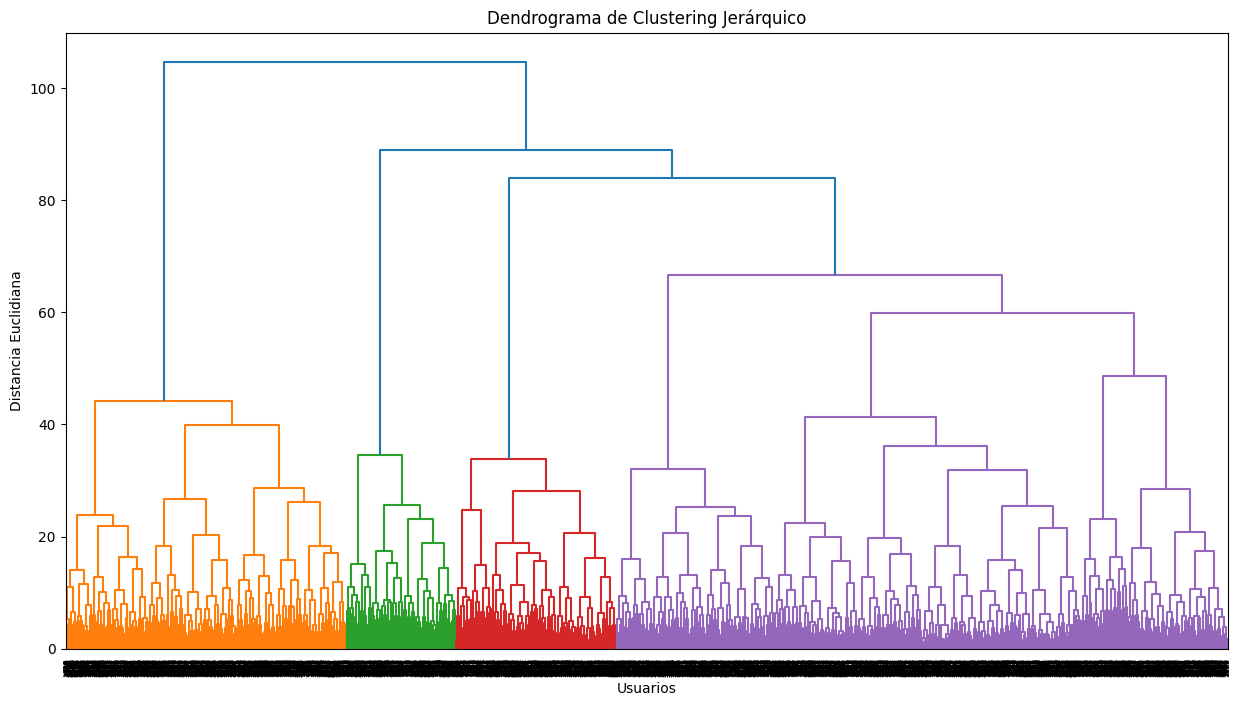

In [17]:
#Crear una matriz de distancias con el método 'ward'
linked = linkage(data_scaled, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(linked)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Usuarios')
plt.ylabel('Distancia Euclidiana')
plt.show()

El dendrograma sugiere que los usuarios del gimnasio pueden ser agrupados en aproximadamente 5 clusters basados en las características estandarizadas. Esta información es crucial para el próximo paso, donde entrenaremos el modelo K-means para agrupar a los usuarios y analizar las características de cada cluster.

**Entrena el modelo de clustering con el algortimo K-means**

In [18]:
#Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
data_clustering['cluster'] = kmeans.fit_predict(data_scaled)

#Agregar etiquetas de clúster al dataframe original
data['cluster'] = data_clustering['cluster']

**Observar los valores medios de característica para los clústeres**

In [19]:
cluster_means = data.groupby('cluster').mean()
print("Valores medios por clúster:")
print(cluster_means)

Valores medios por clúster:
           gender  near_location   partner  promo_friends  phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         contract_period  group_visits        age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster                                          

**¿Hay algo que llame la atención?**
    
* Cluster 1 es el más destacado en términos de retención, con alta frecuencia de clases (2.745505, la más alta entre los clústeres) y baja tasa de cancelación (0.089989) a pesar de la baja proporción de socios y promociones.

* Cluster 2 también muestra una alta retención con contratos largos y baja tasa de cancelación (0.021965).

* Cluster 3 presenta desafíos significativos con la tasa de cancelación más alta (0.572942) y las características menos favorables.

Este análisis puede ayudar a Model Fitness a enfocar sus esfuerzos de retención en mejorar las condiciones para el Cluster 3, mientras refuerza las estrategias exitosas observadas en los Clusters 1 y 2.

**Trazar distribuciones de características para los clústeres**

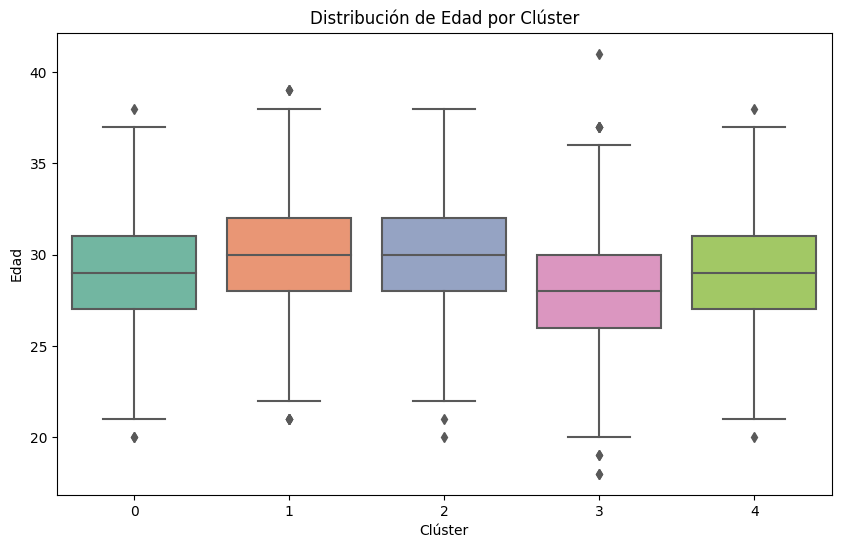

In [20]:
#Ejemplo: Distribución de edad por clúster
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='cluster', y='age', palette='Set2')
plt.title('Distribución de Edad por Clúster')
plt.xlabel('Clúster')
plt.ylabel('Edad')
plt.show()

Análisis:

* Se observa que los clústeres 1 y 2 tienen edades medianas similares y poca variabilidad, lo que sugiere una cohorte más consistente en términos de edad. Estos clústeres probablemente contengan usuarios más homogéneos.

* El clúster 3 presenta una mayor diversidad de edades y más outliers. Esto podría indicar que este clúster está compuesto por una mezcla más heterogénea de usuarios.

* Estos clústeres tienen una distribución similar con medianas de edad alrededor de 29 años y algunas variaciones. La presencia de outliers podría ser indicativa de subgrupos o variabilidad dentro del clúster.

El análisis de la distribución de edad por clúster revela diferencias en la homogeneidad y diversidad de edades entre los clústeres. Esta información puede ser útil para entender mejor las características demográficas de cada grupo y diseñar estrategias de retención adaptadas a las necesidades específicas de cada clúster.

**Calcular la tasa de cancelación para cada clúster**

In [21]:
#Calcular tasa de cancelación por clúster
churn_rates = data.groupby('cluster')['churn'].mean()
print("Tasa de cancelación por clúster:")
print(churn_rates)

Tasa de cancelación por clúster:
cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: churn, dtype: float64


**¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?**

* En el caso del Cluster 0, la tasa de Cancelación es del 24.64%. Esta es una tasa de cancelación relativamente baja, lo que sugiere que los clientes en este clúster son bastante leales. La proximidad al gimnasio y el alto uso de promociones de amigos parecen jugar un papel importante.

* Para el Cluster 1 la tasa de Cancelación es del 8.99%. Este clúster tiene la tasa de cancelación más baja, lo que indica una alta lealtad. Los clientes en este grupo tienen una alta frecuencia de visitas, lo que probablemente contribuye a su retención.

* Para el Cluster 2 la tasa de Cancelación es del 2.20%. Este clúster también muestra una tasa de cancelación muy baja. Los clientes en este grupo tienen contratos de larga duración, lo cual es un factor clave para su alta retención.

* El Cluster 3 tiene una tasa de Cancelación del 57.29%. Este es el clúster con la tasa de cancelación más alta, indicando un grupo de clientes con alta propensión a irse. Estos clientes tienen la menor proximidad al gimnasio, baja participación en promociones, y los contratos más cortos. Estos factores contribuyen a su alta tasa de cancelación.

* En el Cluster 4 la tasa de Cancelación es de 26.68%. Este clúster tiene una tasa de cancelación moderada. Los clientes en este grupo tienen características intermedias y presentan un comportamiento más variado.

**Grupos propensos a irse:** El Cluster 3 es claramente el grupo más propenso a irse, con una tasa de cancelación muy alta. Esto sugiere que las estrategias de retención deben enfocarse especialmente en este clúster, quizás mejorando la proximidad o incrementando la duración de los contratos.

**Grupos leales:** Los Clusters 1 y 2 muestran las tasas de cancelación más bajas, lo que indica una alta lealtad. Estos grupos ya están retenidos efectivamente, probablemente debido a una alta frecuencia de visitas y contratos largos.

# Paso 5. Conclusiones y recomendaciones

**Conclusiones Principales**

* Los clientes con contratos más largos (Clusters 1 y 2) muestran tasas de cancelación significativamente más bajas. Esto sugiere que una mayor duración del contrato se asocia con una mayor lealtad.

* Los clientes que visitan el gimnasio con mayor frecuencia, especialmente en el mes actual, tienden a quedarse (Cluster 1). Fomentar la regularidad en las visitas puede ser clave para la retención.

* La cercanía al gimnasio es un factor importante en la retención de clientes. Los clústeres con clientes que viven o trabajan cerca del gimnasio tienen tasas de cancelación más bajas.

* Las promociones de amigos y ser parte de programas de socios están correlacionados con una mayor retención. Estos incentivos parecen fortalecer el compromiso de los clientes con el gimnasio.

**Recomendaciones de Estrategia de Interacción y Retención**

* Incentivar Contratos de Mayor Duración: Ofrecer descuentos significativos y beneficios adicionales para contratos de 6 meses o 1 año. Promociones como "paga por 10 meses y obtén 2 meses gratis" pueden aumentar el compromiso a largo plazo.

* Fomentar la Frecuencia de Visitas: Implementar programas de recompensas por frecuencia de visitas, como puntos acumulables por cada visita que pueden ser canjeados por servicios adicionales (cafetería, productos deportivos, etc.). Clases y eventos especiales para usuarios frecuentes pueden motivar aún más las visitas regulares.

* Promociones de Amistad y Socios Corporativos: Crear promociones "trae a un amigo" con recompensas tanto para el cliente actual como para el nuevo. Fortalecer los acuerdos con empresas para ofrecer descuentos a empleados y organizar eventos corporativos puede atraer y retener a más clientes.

* Mejorar la Experiencia Inicial y Continuada: Desarrollar programas de bienvenida para nuevos miembros que incluyan sesiones de orientación, entrenadores personales gratuitos por el primer mes y seguimiento personalizado. Para los miembros de larga duración, ofrecer incentivos por hitos alcanzados (como aniversarios de membresía) puede fortalecer la relación a largo plazo.